In [3]:
# 重置所有变量，-f 不询问
%reset -f

# 神经网络二元分类

In [1]:
import sys
# 添加模块导入路径
sys.path.append('/home/zzzzer/Documents/code/python/myworld/deepeasy')

# 重新加载模块
# 为了使外部代码修改生效
from importlib import reload

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import deepeasy.nnet as nnet

In [2]:
def plot_point(x, y):
    fig = plt.figure(figsize=(16, 9), dpi=120)
    plt.scatter(x[:,0], x[:,1], c=y.flatten())
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.show()

# 训练及测试

In [3]:
N_SAMPLES = 1000
NOISE = 0.25
SEED = 100

# ratio between training and test sets
TEST_SIZE = 0.1

## 1 moons 数据

### 生成数据

In [4]:
x, y = make_moons(n_samples=N_SAMPLES, noise=NOISE, random_state=SEED)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=TEST_SIZE, random_state=42)
y_train1 = y_train1.reshape(y_train1.shape[0], 1)
y_test1 = y_test1.reshape(y_test1.shape[0], 1)
print(f'x_train.shape={x_train1.shape}, y_train.shape={y_train1.shape}')
print(f'x_test.shape={x_test1.shape}, y_test.shape={y_test1.shape}')

x_train.shape=(900, 2), y_train.shape=(900, 1)
x_test.shape=(100, 2), y_test.shape=(100, 1)


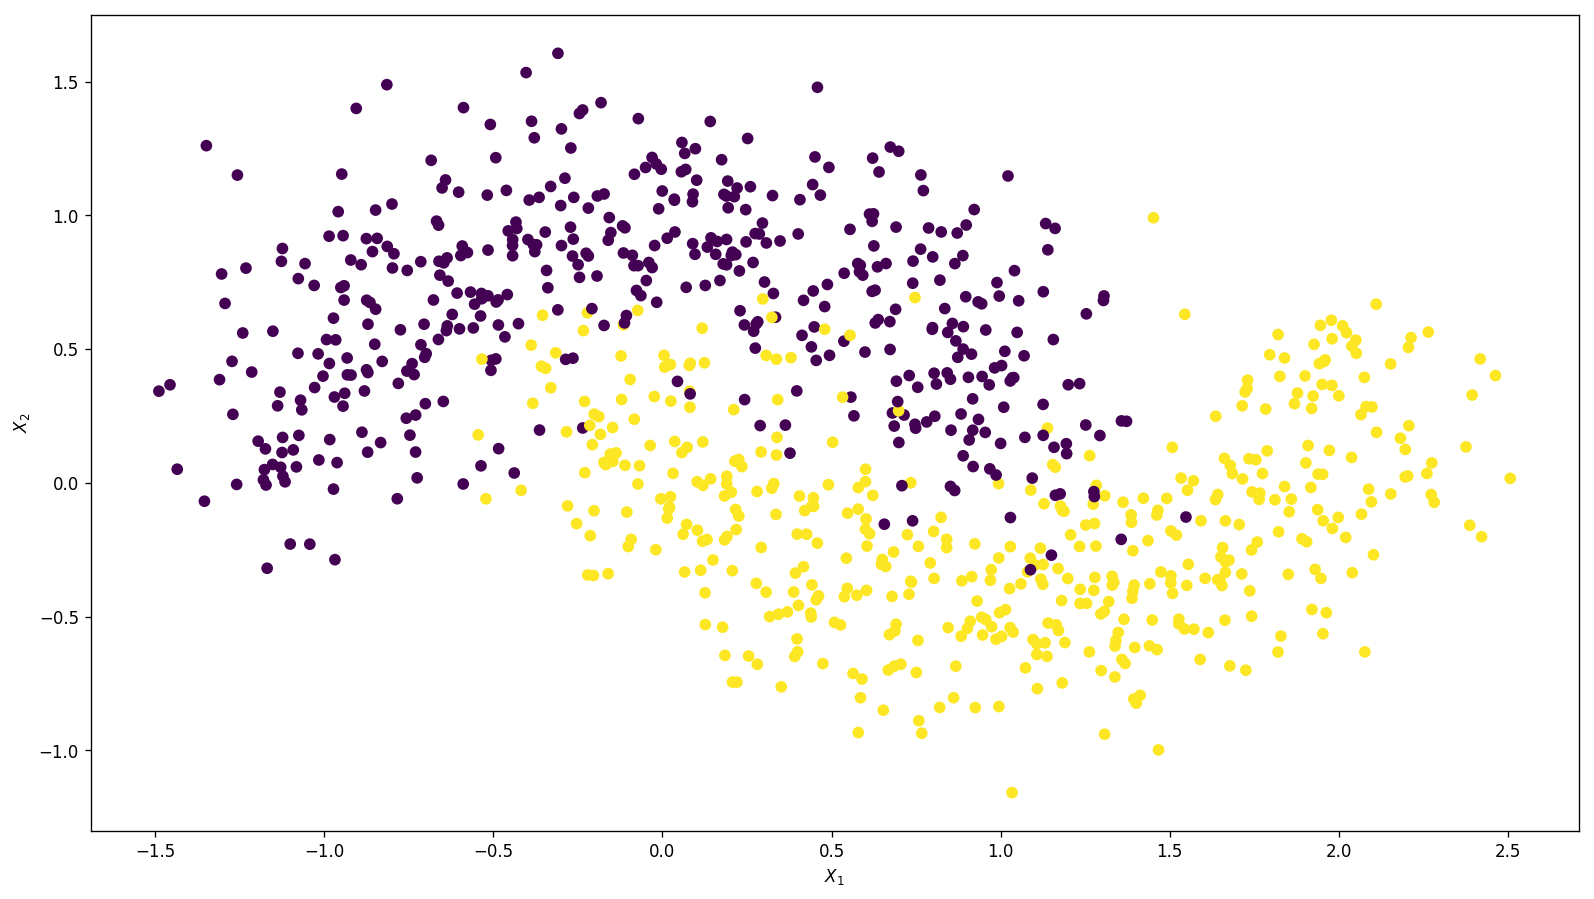

In [5]:
plot_point(x_train1, y_train1)

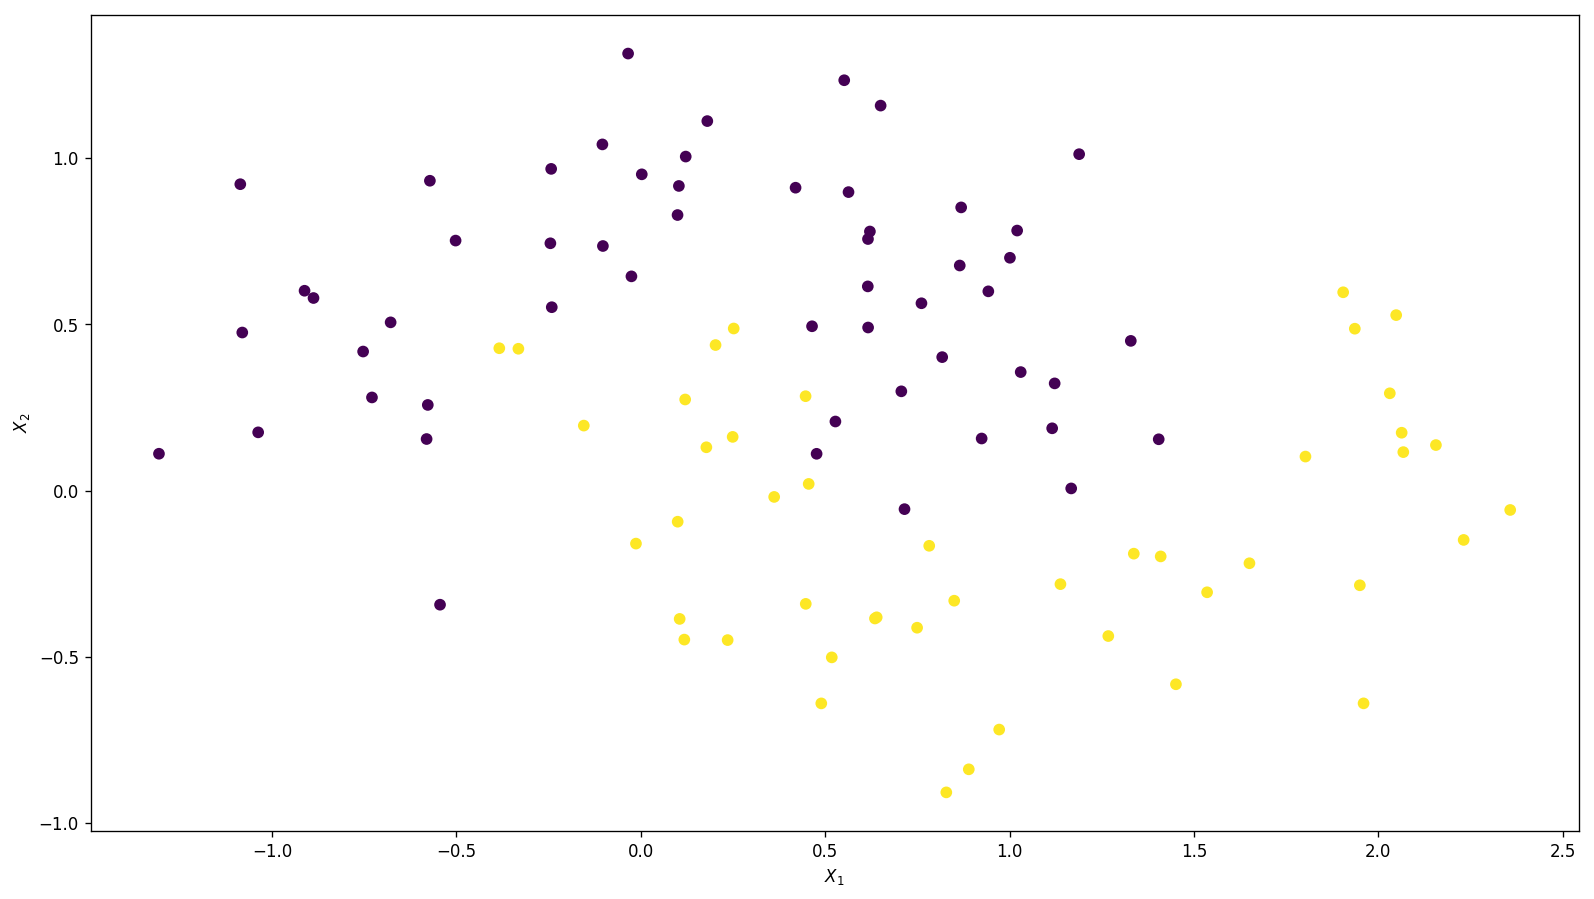

In [6]:
plot_point(x_test1, y_test1)

### 训练

In [7]:
# 神经网络结构
nn_architecture1 = [
    {"input_dim": 2, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 1, "activation": "sigmoid"},
]

In [8]:
# 当 NeuralNetwork 在 __init__.py 中时，不会重新加载，必须 nnet.py 中
reload(nnet)
nn1 = nnet.NeuralNetwork(nn_architecture1, 55)

In [13]:
nn1.reset_params()

In [18]:
nn1.train(
    x_train1, y_train1, 1000,
    new_train=True,
    batch_normalization=False,
    batch_size=100, 
    lr=0.1,
    gd_name='sgd'
)

开始训练，迭代次数：1000
1000
完成！用时：7.102391719818115s


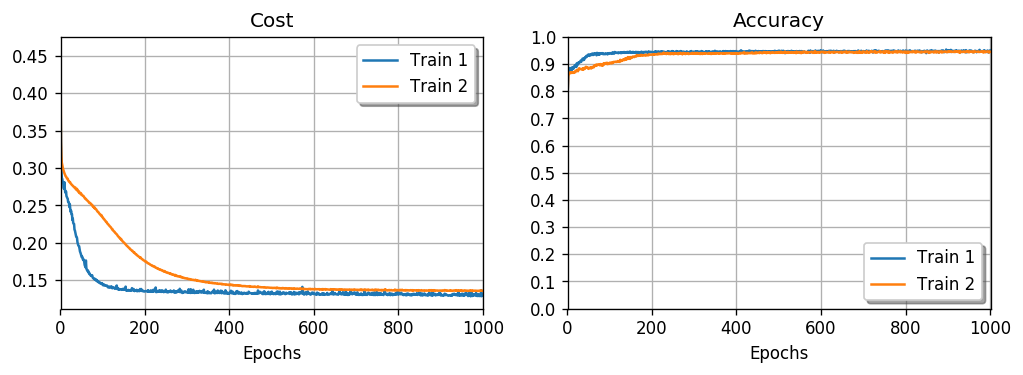

In [19]:
nn1.plot_history()

### 测试

In [20]:
nn1.test_model(x_test1, y_test1)

0.94

## 2 circles 数据

### 生成数据

In [103]:
x, y = make_circles(n_samples=N_SAMPLES, noise=NOISE, factor=0.005, random_state=SEED)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=TEST_SIZE, random_state=42)
y_train2 = y_train2.reshape(y_train2.shape[0], 1)
y_test2 = y_test2.reshape(y_test2.shape[0], 1)
print(f'x_train.shape={x_train2.shape}, y_train.shape={y_train2.shape}')
print(f'x_test.shape={x_test2.shape}, y_test.shape={y_test2.shape}')

x_train.shape=(900, 2), y_train.shape=(900, 1)
x_test.shape=(100, 2), y_test.shape=(100, 1)


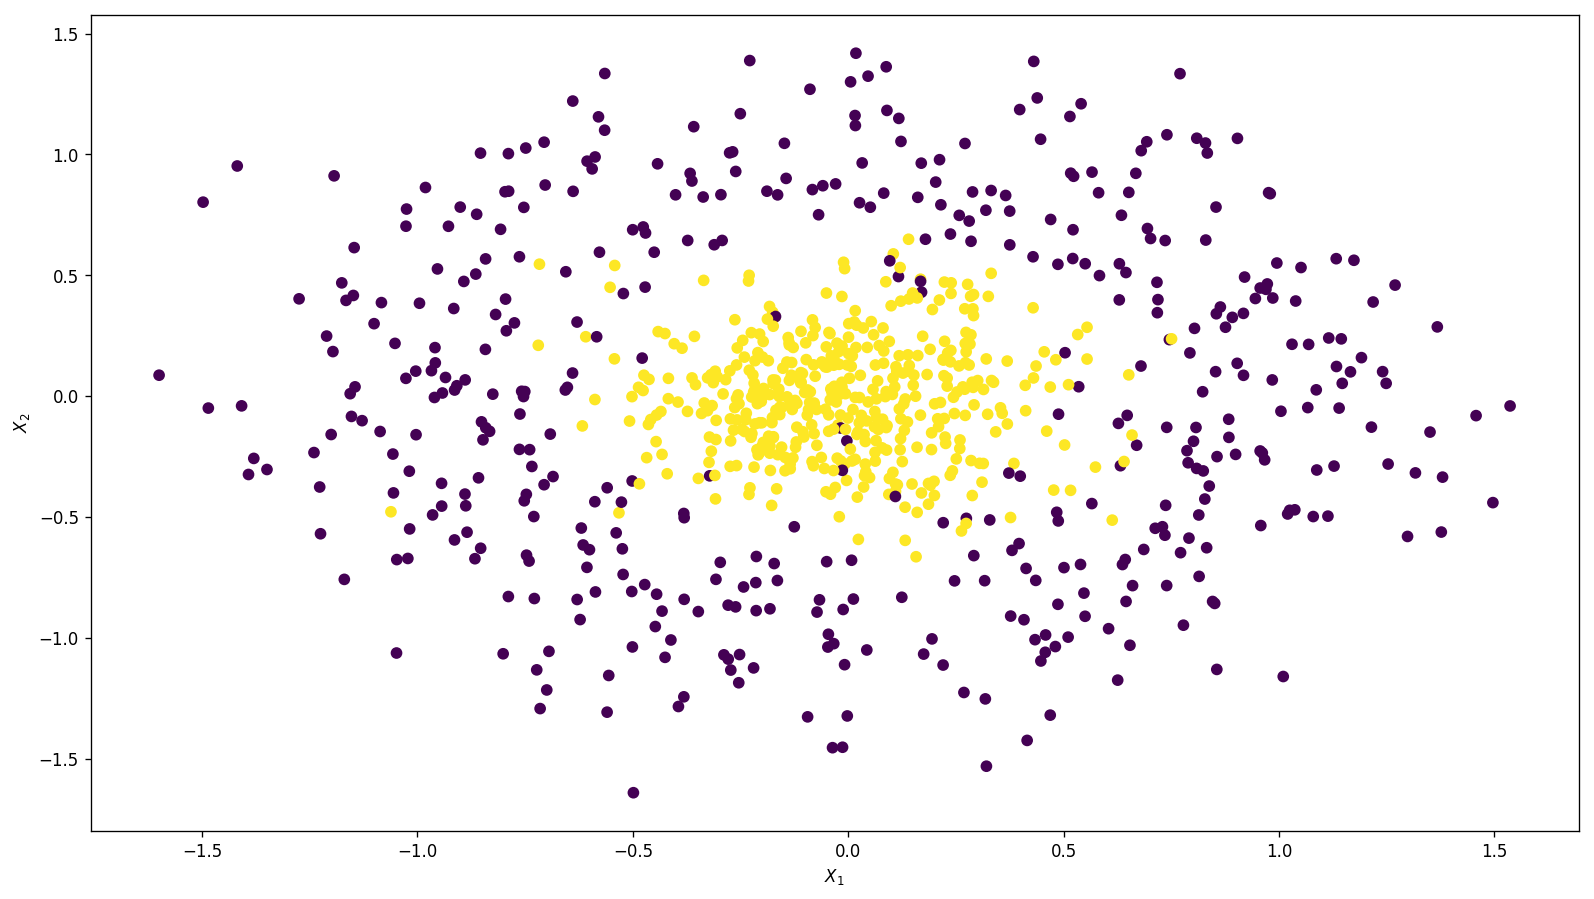

In [104]:
plot_point(x_train2, y_train2)

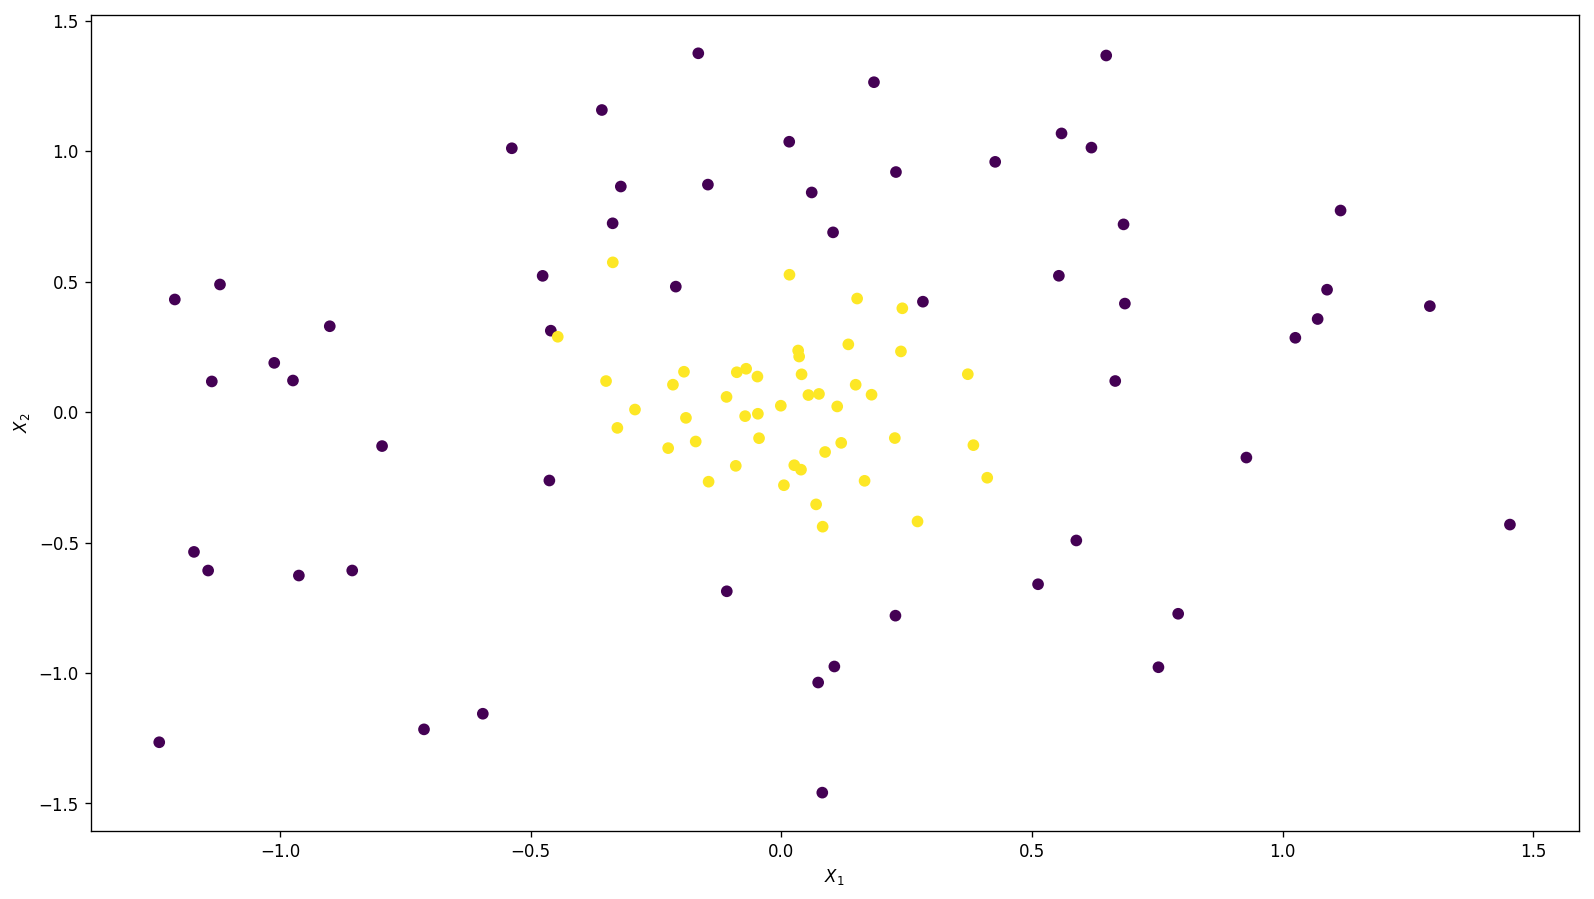

In [105]:
plot_point(x_test2, y_test2)

### 训练

In [153]:
# 神经网络结构
nn_architecture2 = [
    {"input_dim": 2, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 1, "activation": "sigmoid"},
]

In [154]:
reload(nnet)
nn2 = nnet.NeuralNetwork(nn_architecture2, 55)

In [177]:
nn2.train(
    x_train2, y_train2, 1000,
    new_train=True,
    batch_normalization=False,
    batch_size=100, 
    learning_rate=0.1,
    gd_func_name='sgd'
)

开始训练，迭代次数：1000
1000
完成！用时：3.225632429122925s


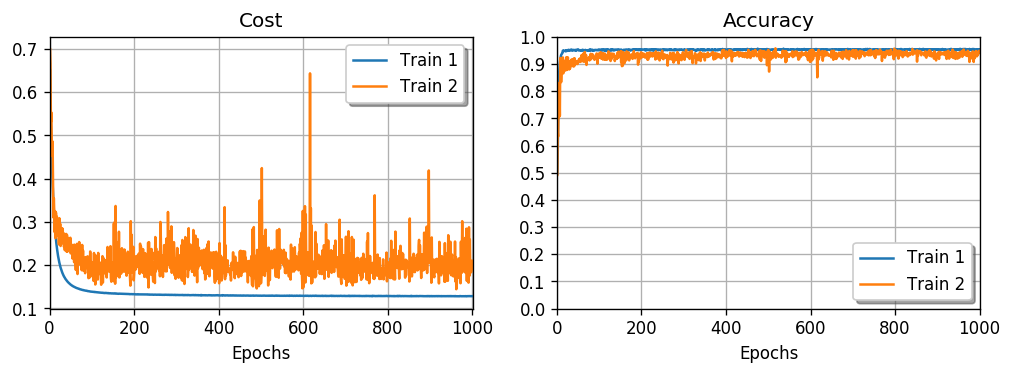

In [178]:
nn2.plot_history()

### 测试

In [179]:
nn2.test_model(x_test2, y_test2)

0.94